In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
hr = pd.read_csv(r"C:\Hogwarts\machine_learning\Cases\human-resources-analytics\HR_comma_sep.csv")

In [3]:
dum_hr = pd.get_dummies(hr,drop_first=True)

In [24]:
X = dum_hr.drop('left',axis = 1)
y = dum_hr['left']

le = LabelEncoder()
le_y = le.fit_transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [26]:
dtc = DecisionTreeClassifier(random_state= 2022,
                            max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2022)

In [27]:
param = {'max_depth':[2,3,4,5,None],
         'min_samples_split':[2,5,10],
         'min_samples_leaf':[1,5,10]}

In [28]:
kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 2022)

In [29]:
gcv  = GridSearchCV(dtc , param_grid = param, verbose=3,
                   cv = kfold,scoring='neg_log_loss')
gcv.fit(X,le_y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.283 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.290 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.290 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.289 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.293 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.283 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.290 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.290 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.289 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_

[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=-0.121 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=-0.127 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=-0.128 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-0.132 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-0.127 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-0.121 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-0.127 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=-0.128 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-0.132 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=-0.127 total time=   0.0

[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-0.129 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-0.108 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-0.124 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=-0.113 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.679 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.875 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.622 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.748 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.703 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss', verbose=3)

In [30]:
print(gcv.best_params_)

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [31]:
print(gcv.best_score_)

-0.11403141545309385


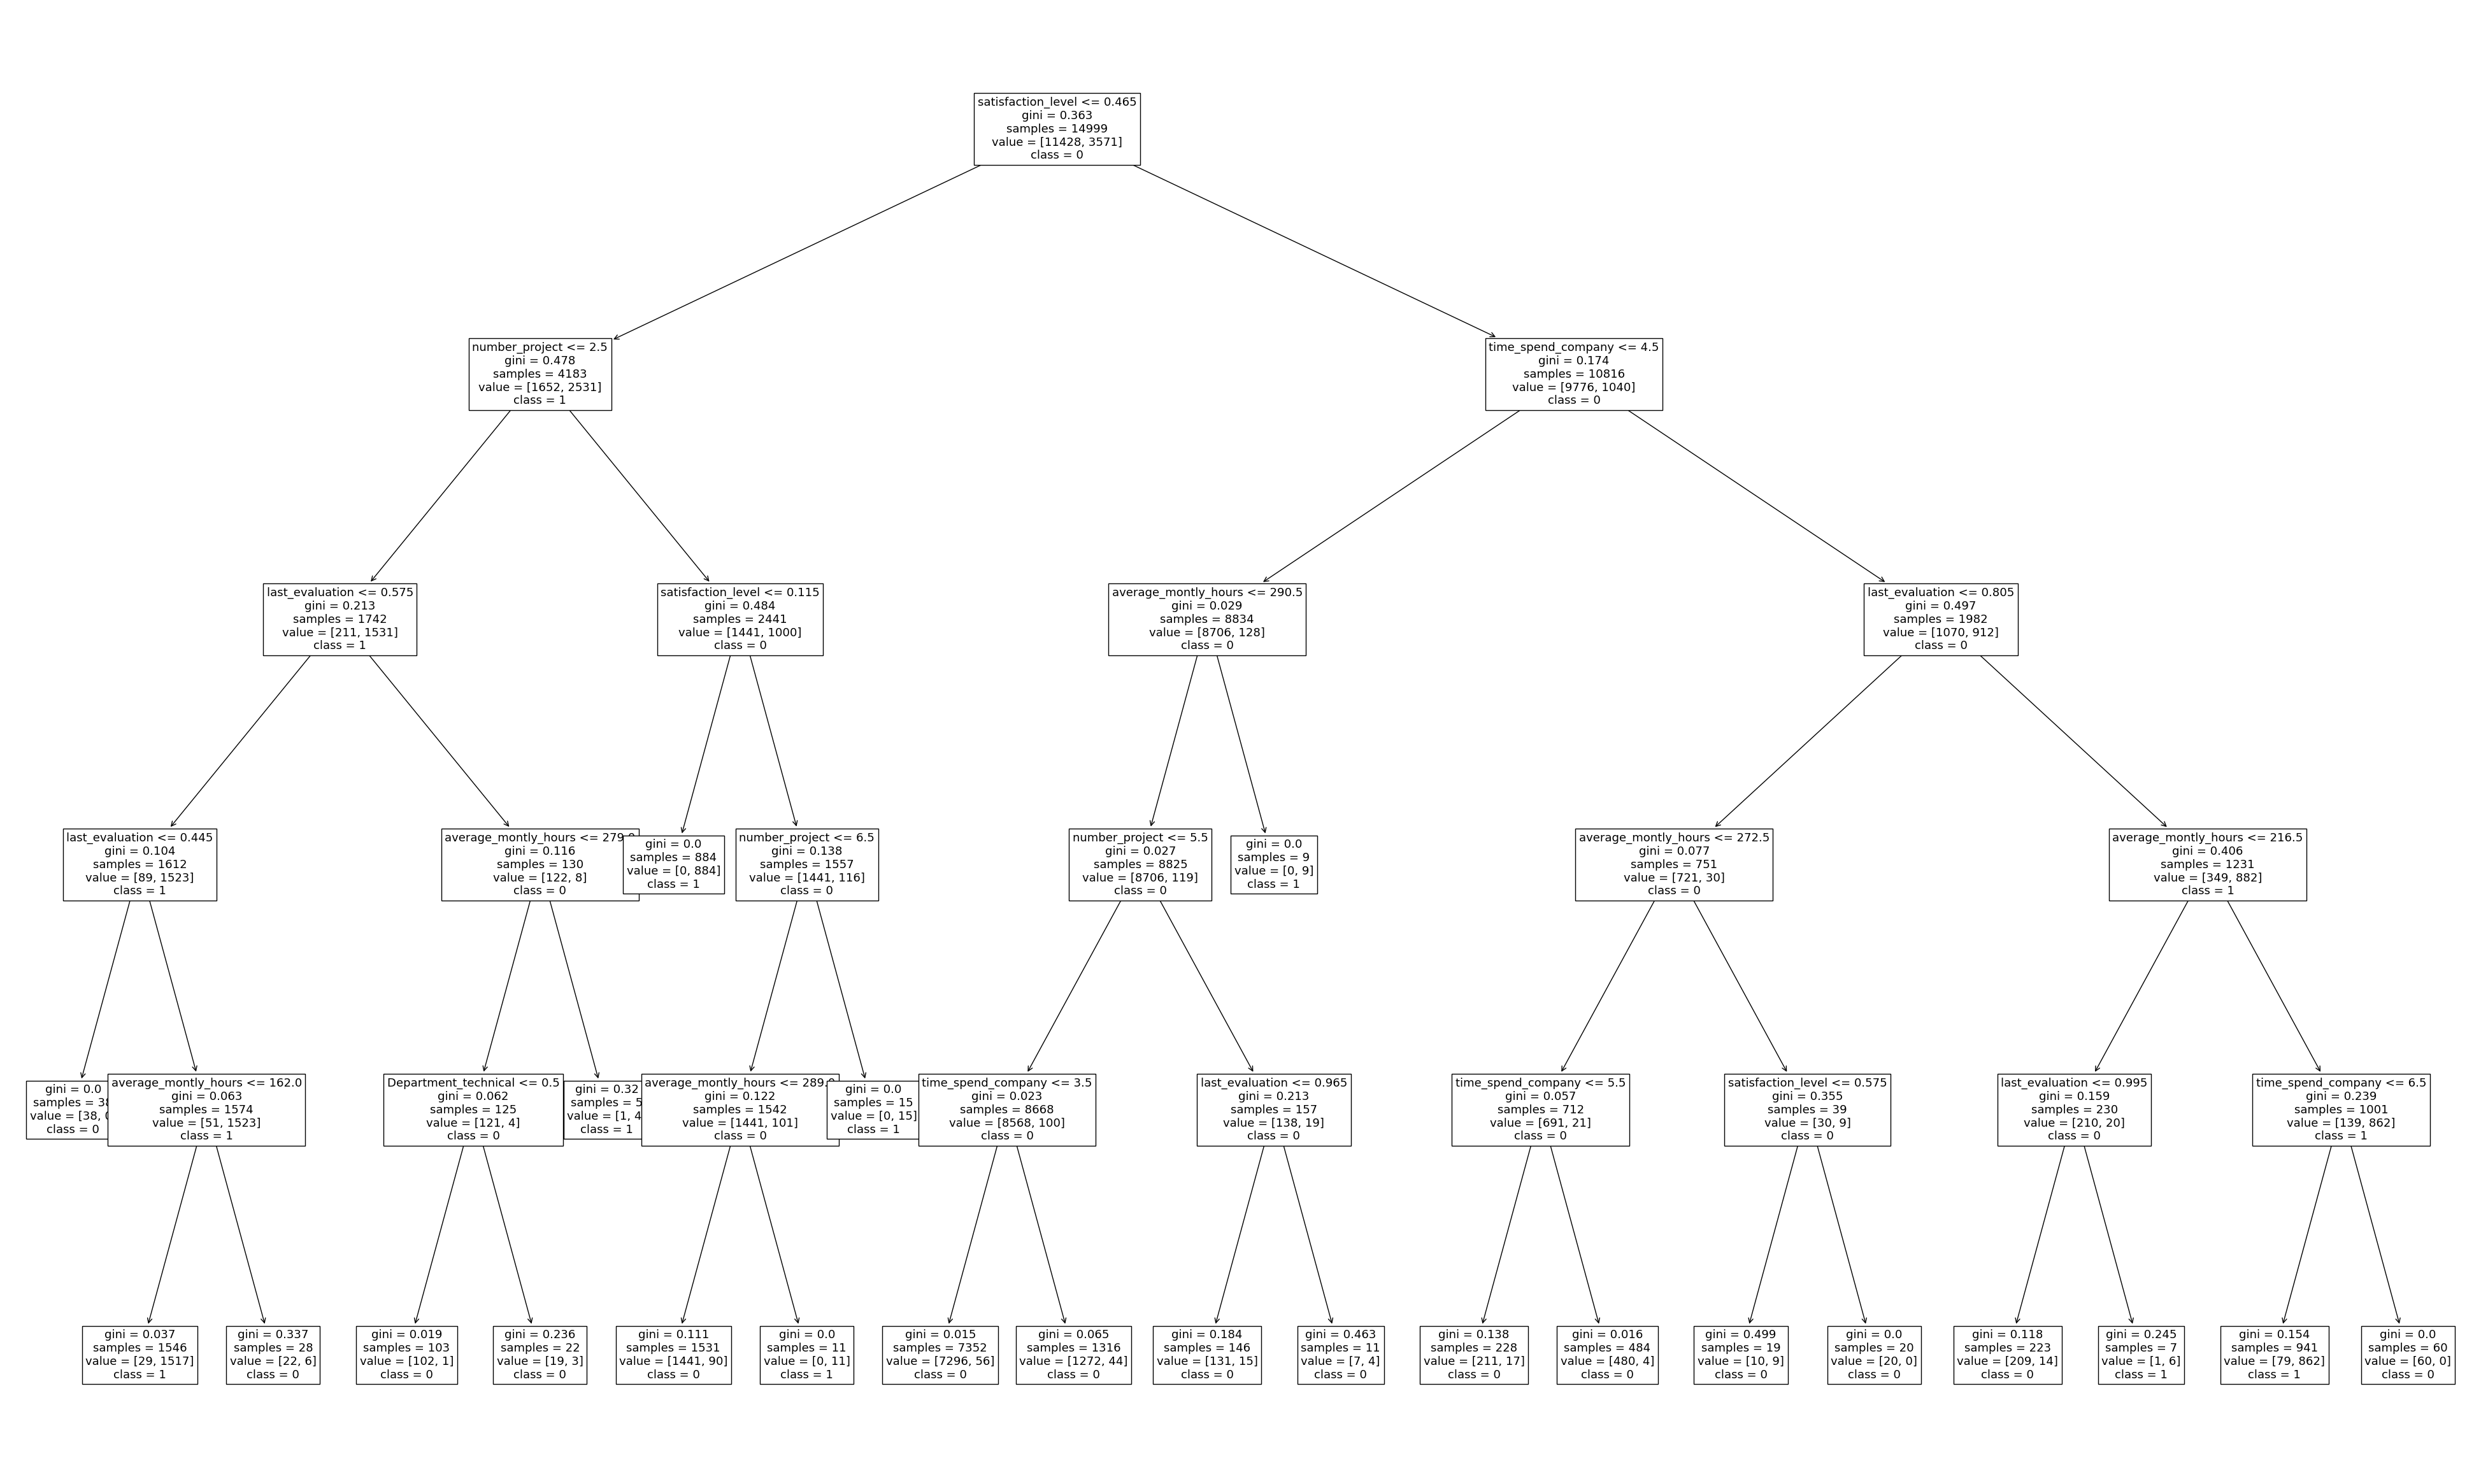

In [32]:
best_model = gcv.best_estimator_
plt.figure(figsize = (50,30))
plot_tree(best_model, feature_names = X.columns,
          class_names=['0','1'], fontsize= 13)
plt.show()

[5.33520521e-01 1.46213437e-01 1.00528270e-01 6.36284293e-02
 1.55986832e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.22511204e-04
 0.00000000e+00 0.00000000e+00]


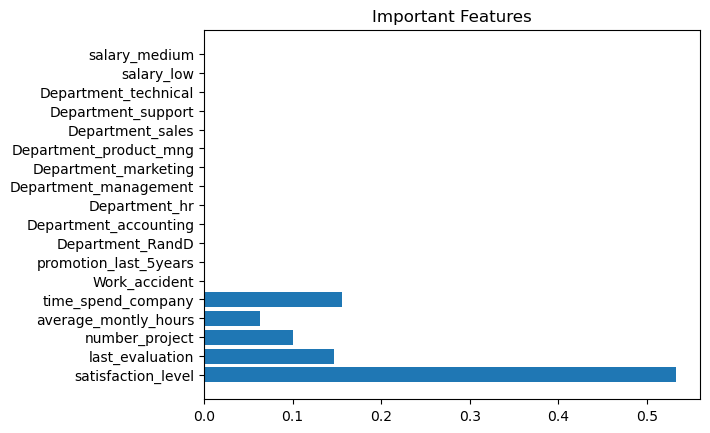

In [34]:
# featurer importance plot

print(best_model.feature_importances_)
imps = best_model.feature_importances_
plt.barh(X.columns, imps)
plt.title("Important Features")
plt.show()